# Clustering Machine Learning - Grouping of Similar Type of Patients

**The dataset appears to contain medical records of patients, potentially related to heart failure, given the column names. Here are the columns present in the dataset:**

**age:** Age of the patient

**anaemia:** Whether the patient has anaemia (1 = yes, 0 = no)

**creatinine_phosphokinase:** Level of the CPK enzyme in the blood (mcg/L)

**diabetes:** Whether the patient has diabetes (1 = yes, 0 = no)

**ejection_fraction:** Ejection fraction percentage (a measure of heart function)

**high_blood_pressure:** Whether the patient has high blood pressure (1 = yes, 0 = no)

**platelets:** Platelet count in the blood (kiloplatelets/mL)

**serum_creatinine:** Level of serum creatinine in the blood (mg/dL)

**serum_sodium:** Level of serum sodium in the blood (mEq/L)

**sex:** Sex of the patient (1 = male, 0 = female)

**smoking:** Whether the patient smokes (1 = yes, 0 = no)

**time:** Follow-up period (days)

**DEATH_EVENT:** Whether the patient experienced a death event (1 = yes, 0 = no)

#### To cluster this data, we need to focus on relevant features that can help differentiate between different groups of patients. Let's proceed with basic preprocessing and explore clustering techniques on this data. We will:

Check for any missing values.

Scale the features if necessary.

Apply clustering techniques like K-means.

Evaluate the clustering results.

**Let's start!**


**Suppressing Warnings**

Ensures that all warning messages are hidden during code execution to maintain a clean and uncluttered output.

**Useful in scenarios such as:**
Presentations or demonstrations, where clarity and focus are essential.
Avoiding distractions from non-critical messages like deprecated features or library updates.

Helps maintain a professional and concise output for notebooks or reports.

**Caution:** Should be used sparingly, as warnings may indicate potential issues or areas that require attention during debugging or development.

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

**Step 1: Load the Data**

### Loading and Previewing the Dataset

- **Objective**: This cell loads the dataset and provides a quick preview of its structure.
- **Steps Performed**:
  - **Load the Data**: The dataset is loaded from a CSV file into a pandas DataFrame for further analysis.
  - **File Path**: The variable `file_path` specifies the location of the dataset file (`heart_failure_clinical_records_dataset.csv`).
  - **Preview the Data**: `data.head()` displays the first few rows of the dataset to understand its structure, column names, and data types.
- **Purpose**:
  - Quickly verify that the dataset is loaded correctly.
  - Get an initial understanding of the data format for planning subsequent analysis.

In [ ]:
import pandas as pd

# Load the data
file_path = "heart_failure_clinical_records_dataset.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


**Step 2: Check for Missing Values**

### Checking for Missing Values

- **Objective**: This cell checks the dataset for any missing values to ensure data completeness and identify potential preprocessing needs.
- **Steps Performed**:
  - **Identify Missing Values**: The `isnull()` function checks each value in the dataset, returning `True` for missing values and `False` otherwise.
  - **Count Missing Values**: The `sum()` function calculates the total number of missing values in each column.
  - **Display Results**: The results are printed to show the count of missing values for each column.
- **Purpose**:
  - Identify columns with missing data that might require handling (e.g., imputation or removal).
  - Ensure the dataset is ready for analysis or modeling without errors caused by missing values.

In [ ]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


**Step 3: Drop the Target Column DEATH_EVENT**

### Dropping the Target Column for Clustering

- **Objective**: Prepare the dataset for clustering by removing the target column, as clustering is an unsupervised learning technique that does not require labeled data.
- **Steps Performed**:
  - **Drop the Target Column**: The `drop()` function removes the `DEATH_EVENT` column, which is the target variable in this dataset.
  - **Create a Features Dataset**: The remaining columns, which are predictors, are stored in the `features` DataFrame.
  - **Preview the Features**: The `head()` function is used to display the first few rows of the features dataset to ensure it was processed correctly.
- **Purpose**:
  - Exclude the target variable since it is not needed for clustering.
  - Use the remaining features to group data points based on similarities.

In [ ]:
# Drop the target column "DEATH_EVENT" for clustering purposes
features = data.drop(columns=["DEATH_EVENT"])

# Display the first few rows of the features
features.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


**Step 4: Standardize the Features**

### Standardizing Features

- **Objective**: Standardize the feature values to ensure they are on the same scale, which is essential for clustering algorithms like K-Means.
- **Steps Performed**:
  - **Import StandardScaler**: A preprocessing tool from `sklearn` to standardize the features by removing the mean and scaling to unit variance.
  - **Initialize the Scaler**: The `StandardScaler()` object is created to perform the scaling.
  - **Apply Scaling**: The `fit_transform()` method standardizes the features, ensuring all columns have a mean of 0 and a standard deviation of 1.
  - **Check Shape**: Displays the shape of the transformed features to verify the process.
- **Purpose**:
  - Standardization prevents features with larger scales from dominating the clustering process.
  - Ensures fair contributions of all features to the distance calculations used in clustering algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Display the first few rows of the standardized features
print("\nStandardized Features Shape:", features_scaled.shape)


Standardized Features Shape: (299, 12)


**Step 5: Determine the Optimal Number of Clusters Using the Elbow Method**

### Determining Optimal Number of Clusters Using the Elbow Method

- **Objective**: Identify the optimal number of clusters for K-Means clustering by analyzing the elbow point in the WCSS curve.

- **Steps Performed**:
  - **Calculate WCSS**:
    - The Within-Cluster Sum of Squares (WCSS) measures the compactness of clusters. Lower values indicate tighter clusters.
    - For each value of `k` (number of clusters) in the range 1 to 20:
      1. A `KMeans` model is initialized with `n_clusters=k` and fitted to the scaled features.
      2. The WCSS value is calculated using the `inertia_` attribute and appended to the list `wcss`.
  - **Plot the Elbow Curve**:
    - The curve plots the number of clusters (`k`) on the x-axis and WCSS on the y-axis.
    - The "elbow point" in the curve indicates the optimal number of clusters, where adding more clusters results in diminishing improvements in WCSS.

- **Purpose**:
  - The elbow method helps balance the trade-off between cluster compactness (lower WCSS) and simplicity (fewer clusters).
  - Selecting the optimal `k` ensures meaningful and interpretable clustering results.

- **Visualization**:
  - The line plot highlights the point where the WCSS curve starts to flatten, suggesting the optimal number of clusters.

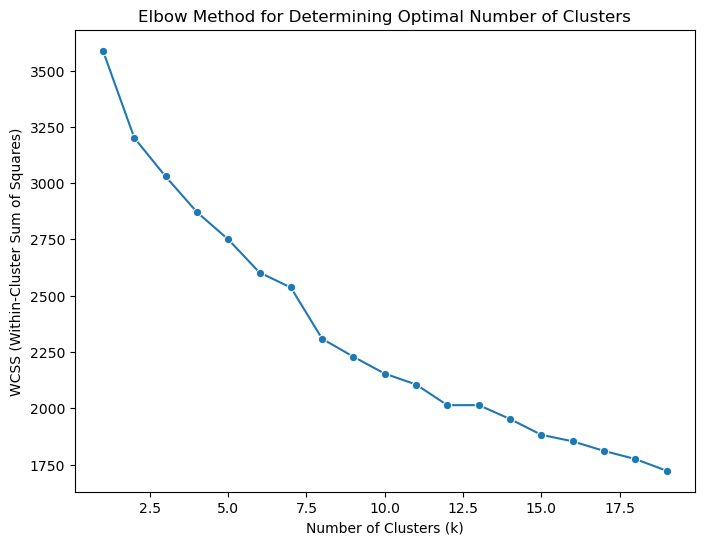

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Determine the optimal number of clusters using the elbow method
wcss = []
k_values = range(1, 20)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=k_values, y=wcss, marker='o')
plt.title("Elbow Method for Determining Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.show()

**Step 6: Apply K-means Clustering with Optimal Number of Clusters**

### Applying K-Means Clustering with Optimal Clusters

- **Objective**: Perform K-Means clustering using the optimal number of clusters (`k`) determined from the elbow method.

- **Steps Performed**:
  - **Set the Number of Clusters**:
    - The `optimal_k` variable is set to `3`, which is the ideal number of clusters determined earlier.
  - **Initialize the K-Means Model**:
    - The `KMeans` object is created with `n_clusters=3` and a fixed `random_state` for reproducibility.
  - **Fit the Model and Predict Clusters**:
    - The `fit_predict()` method scales the features and assigns each data point to a cluster, returning an array of cluster labels.
  - **Display Cluster Labels**:
    - Prints the first 10 cluster labels to verify the clustering output.

- **Purpose**:
  - Assigns each data point to one of the three clusters based on feature similarity.
  - Enables further analysis of clusters and their characteristics.

In [ ]:
# Apply K-means clustering with 3 clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Display the cluster labels
print("\nCluster Labels:\n", clusters[:10])


Cluster Labels:
 [0 0 0 0 2 0 0 0 1 0]


**Step 7: Display the Clusters against Records**

### Adding Cluster Labels to the Original Data

- **Objective**: Integrate the clustering results into the original dataset for easier analysis and interpretation.

- **Steps Performed**:
  - **Add Cluster Labels**:
    - A new column, `Cluster`, is added to the original dataset (`data`), containing the cluster labels for each data point.
  - **Display Updated Data**:
    - The updated dataset, including the `Cluster` column, is displayed to confirm that the labels have been added correctly.

- **Purpose**:
  - Allows for deeper analysis by associating clusters with the original features and target variable (if applicable).
  - Facilitates the exploration of patterns and characteristics unique to each cluster.

In [ ]:
# Add cluster labels to the original data
data['Cluster'] = clusters

# Display the first few rows with the cluster labels
data


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,Cluster
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,1
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,2
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0


**Step 8: Analyze the Clusters by Computing the Mean Values of Features**

### Calculating Mean Values of Features for Each Cluster

- **Objective**: Summarize the key characteristics of each cluster by calculating the mean values of the features within each cluster.

- **Steps Performed**:
  - **Group by Cluster**:
    - The dataset is grouped by the `Cluster` column to segment the data into clusters.
  - **Calculate Mean Values**:
    - The `mean()` function computes the average of all numerical features for each cluster.
  - **Display Results**:
    - The calculated mean values for each cluster are printed to understand the distinguishing features of each group.

- **Purpose**:
  - Highlights the unique characteristics of each cluster, making it easier to interpret and differentiate between groups.
  - Useful for drawing insights and understanding the composition of the clusters.

In [ ]:
# Calculate the mean values of the features for each cluster
cluster_means = data.groupby('Cluster').mean()
print("\nCluster Means:\n", cluster_means)


Cluster Means:
                age   anaemia  creatinine_phosphokinase  diabetes  \
Cluster                                                            
0        61.406250  0.335938                644.429688  0.210938   
1        63.752941  0.623529                389.800000  0.164706   
2        57.096907  0.383721                678.488372  0.976744   

         ejection_fraction  high_blood_pressure      platelets  \
Cluster                                                          
0                34.773438             0.273438  250020.737422   
1                45.376471             0.529412  264876.543647   
2                35.802326             0.290698  281708.025000   

         serum_creatinine  serum_sodium       sex   smoking        time  \
Cluster                                                                   
0                1.434375    136.203125  1.000000  0.703125  127.148438   
1                1.228824    138.305882  0.329412  0.035294  121.917647   
2          

**Step 9: Optionally Visualize the Clusters**

### Visualizing Clusters with a Pair Plot

- **Objective**: Create a pair plot to visually explore the relationships between features within each cluster and observe the distribution of clusters.

- **Steps Performed**:
  - **Create Pair Plot**:
    - A pair plot is generated using `sns.pairplot()`, with the `Cluster` column used to color-code data points.
    - The `diag_kind='kde'` option is used to display kernel density estimation (KDE) plots on the diagonal.
  - **Customize Plot**:
    - A title is added to the pair plot for clarity.
    - Font sizes of the axis labels are adjusted for better readability.
    - A legend is added to indicate which color corresponds to which cluster.
  - **Save Plot**:
    - The pair plot is saved as an image file (`clusters_pairplot.png`) for reference or reporting.

- **Purpose**:
  - Helps visualize the separation between clusters in feature space.
  - Identifies patterns, overlaps, or outliers within and across clusters.
  - Provides a visual representation of how well the clustering algorithm has grouped the data.

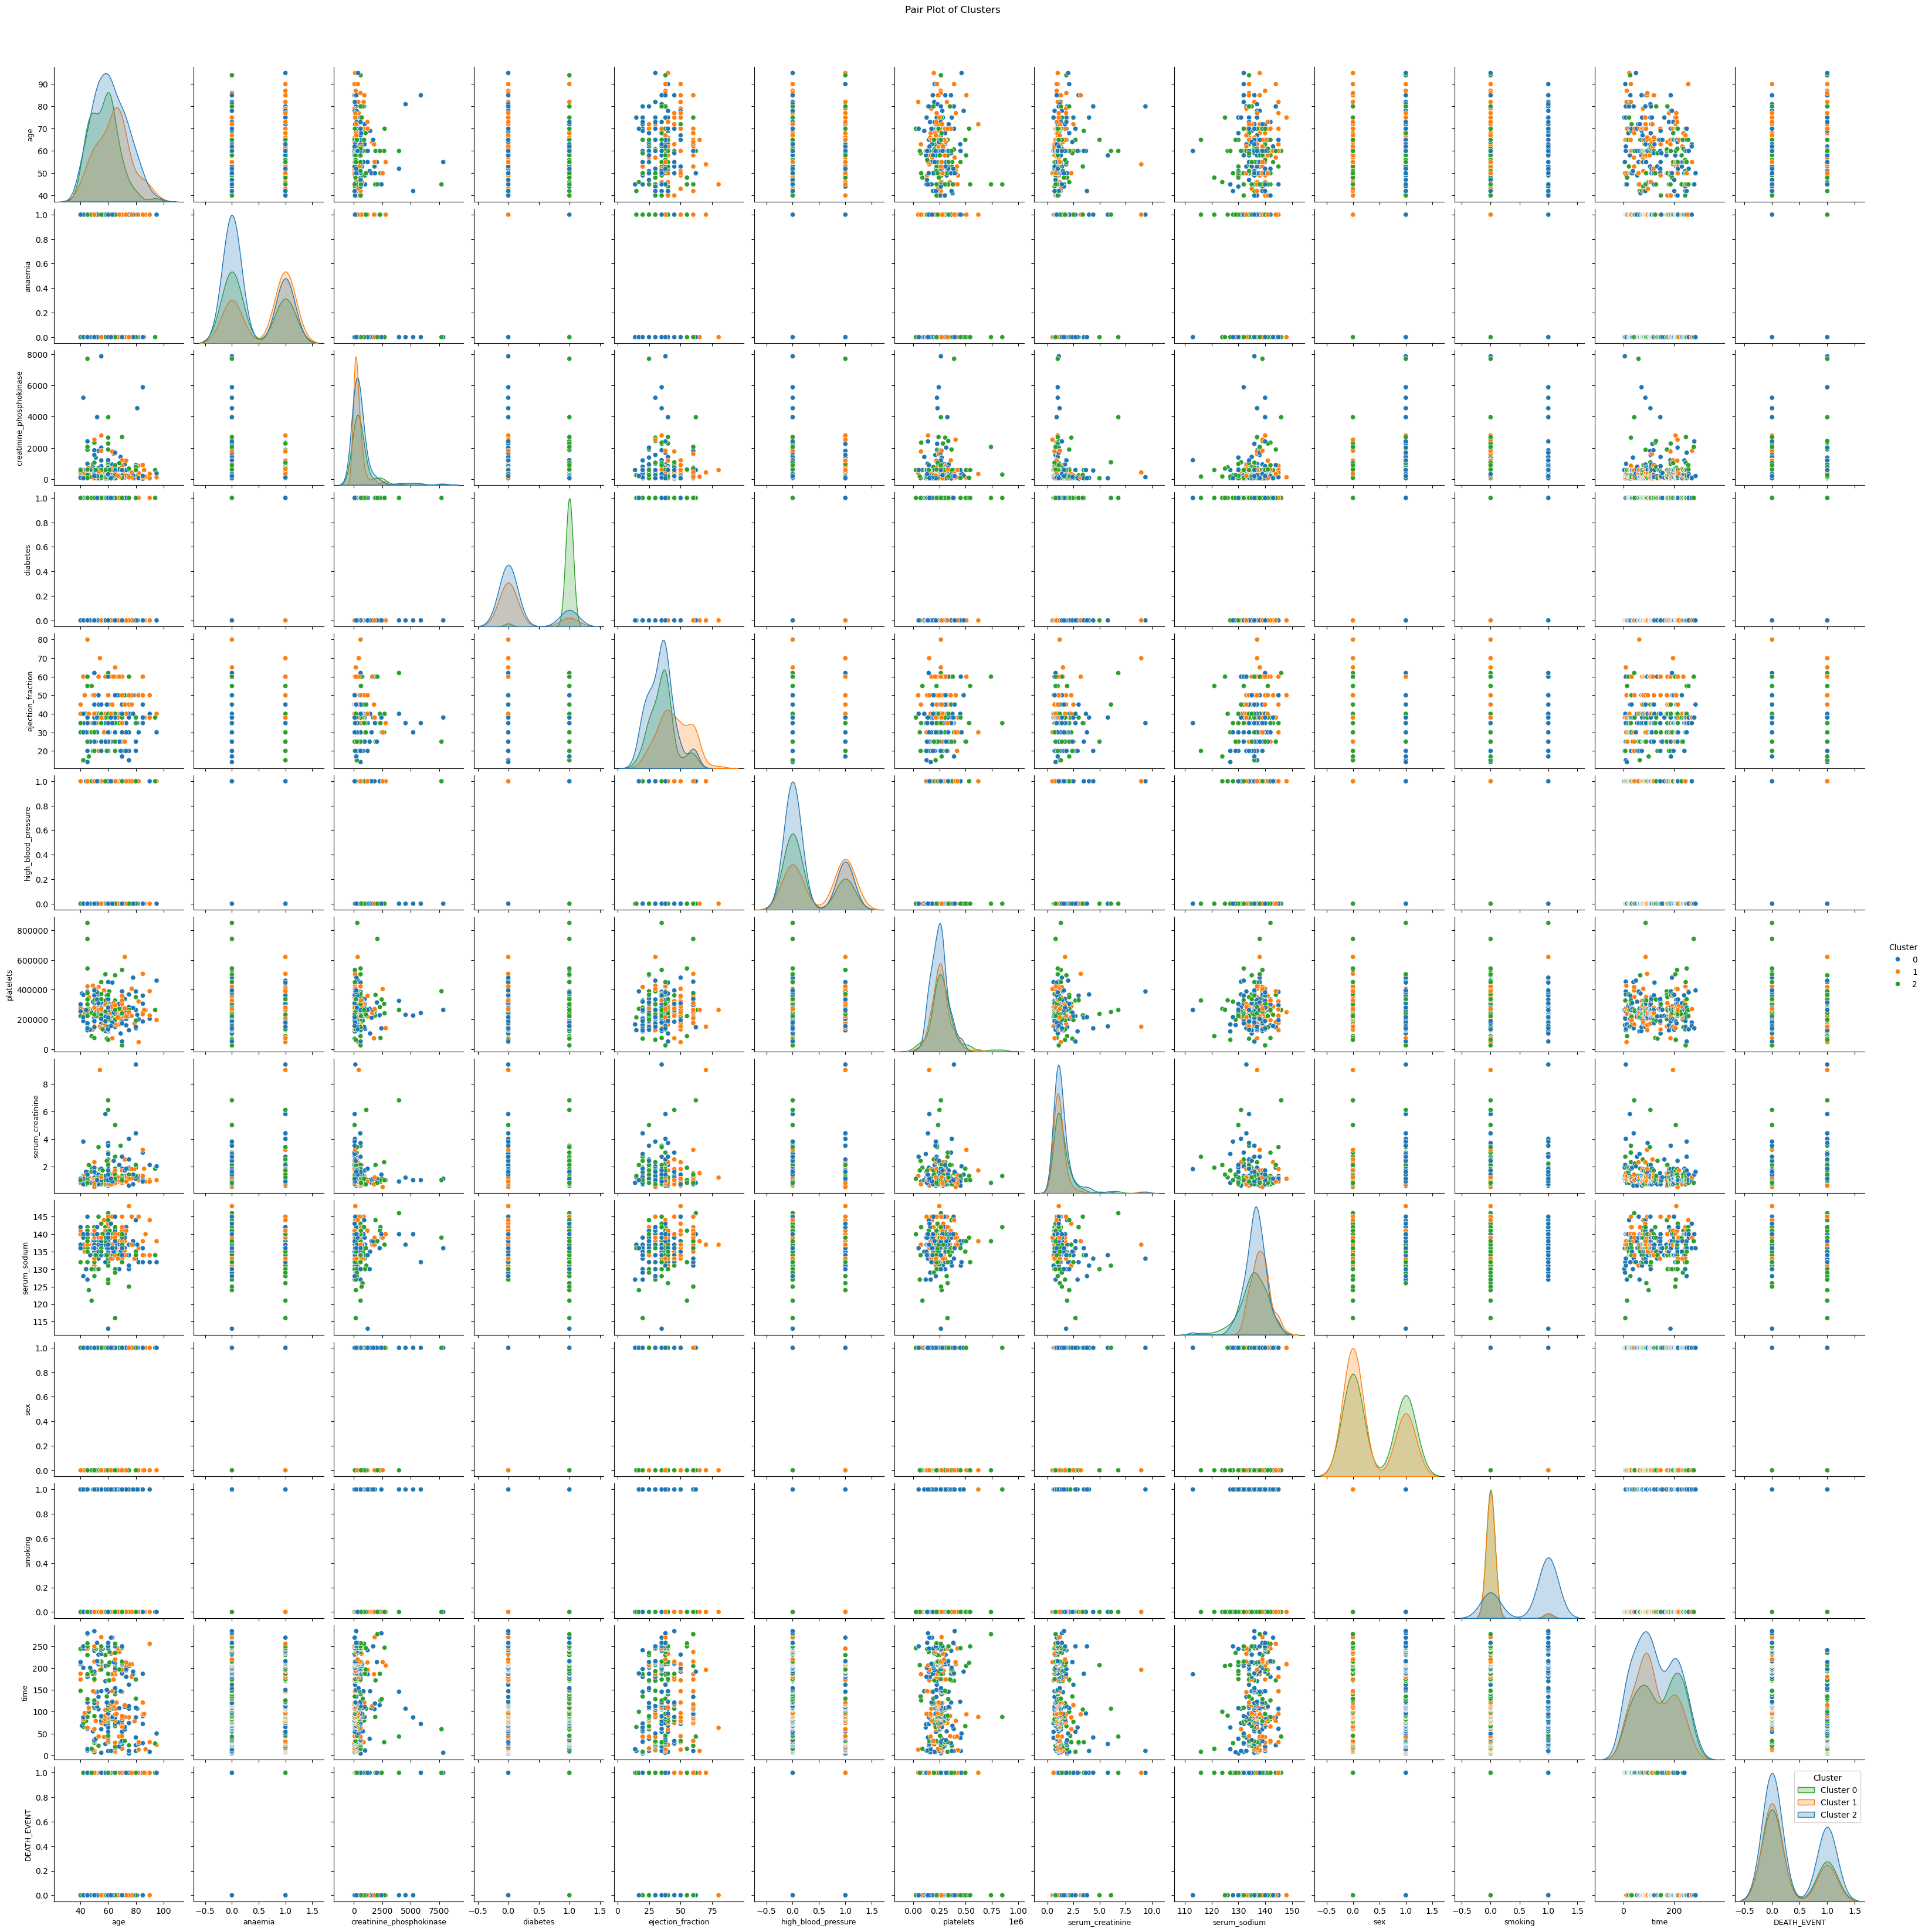

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the clusters using a pairplot with labels
pair_plot = sns.pairplot(data=data, hue='Cluster', palette='tab10', diag_kind='kde')

# Label the pairplot axes
pair_plot.fig.suptitle("Pair Plot of Clusters", y=1.02)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=9)
    ax.set_ylabel(ax.get_ylabel(), fontsize=9)

# Add legend to plot to show which cluster corresponds to which label
plt.legend(title='Cluster', loc='upper right', labels=['Cluster 0', 'Cluster 1', 'Cluster 2'])

# Save the pairplot image
pair_plot.savefig("clusters_pairplot.png")
plt.show()


#### Cluster Observations:

**Cluster 0** seems to have patients with moderate ejection fraction and serum creatinine levels. This cluster has a mix of patients with and without high blood pressure and diabetes. The average age is around 59 years, and the death event rate is approximately 29.6%.

**Cluster 1** has older patients (average age ~70 years), higher death event rate (51.1%), and a higher prevalence of high blood pressure. This cluster also has patients with higher serum creatinine and lower serum sodium levels.

**Cluster 2** contains younger patients (average age ~54 years), lower death event rate (17.8%), and higher creatinine phosphokinase levels. This cluster has a higher percentage of male patients and smokers.

These clusters can help in better understanding the patterns in patient data and may assist in tailoring treatments accordingly.
